$\textbf{TP n°1 - Statistiques}$
<br>Mohamed SANAD (MS BGD)

# Importation des paquets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stat
import sklearn.linear_model as lm
from sklearn import datasets
from sklearn.utils import resample
import statsmodels.api as sm

# Question 1 :

Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [2]:
df = pd.read_csv('invest.txt', sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Question 2 :

Réaliser le graphe suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

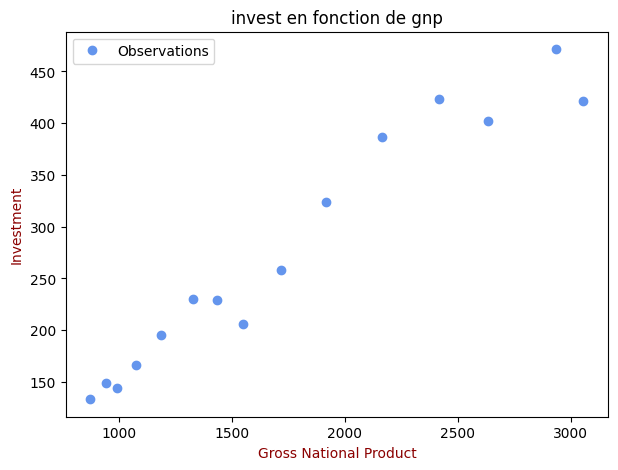

In [3]:
fig = plt.figure(figsize=(7,5))

plt.plot(df['gnp'], df['invest'], 'o', label="Observations", color="cornflowerblue")

plt.title("invest en fonction de gnp")
plt.xlabel("Gross National Product", color='darkred')
plt.ylabel("Investment", color='darkred')

plt.legend(loc='upper left')

plt.show()

Transformation des 2 variables gnp et invest en échelle logarithmique :

In [4]:
X = np.asarray(np.log(df['gnp']))
Y = np.asarray(np.log(df['invest']))

In [5]:
X

array([6.77239364, 6.85012617, 6.9004285 , 6.98249163, 7.07825726,
       7.19022378, 7.26836248, 7.34549395, 7.4489161 , 7.55919466,
       7.67966743, 7.79061331, 7.87591714, 7.98538224, 8.02535287])

In [6]:
Y

array([4.89260223, 5.0059577 , 4.97120122, 5.11439453, 5.27299956,
       5.43720937, 5.4324111 , 5.32836149, 5.55257191, 5.78105211,
       5.95739057, 6.04737218, 5.99719808, 6.1559191 , 6.04476832])

# Note :

Lorsque l’on traite des données monétaires, on travaille souvent en échelle logarithmique (pour
prendre en compte les différences d’échelle).
<br>Les questions suivantes (3 à 6) doivent être réalisées par l’intermédiaire d’opérations élémentaires,
sans utiliser de librairies existantes.

# Question 3 :

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible.

In [7]:
X_bar = X.mean()
Y_bar = Y.mean()

b1 = np.sum((X - X_bar)*(Y - Y_bar)) / np.sum((X - X_bar)**2)
b0 = Y_bar - b1*X_bar

Y_pred = b0 + b1*X ### valeurs prédites

# Estimation des écart-types (erreur, intercept, pente) 
std_epsilon = np.sqrt(np.sum((Y - Y_pred)**2) / (len(Y)-2))
std_intercept = np.sqrt((std_epsilon**2) * (1/len(Y) + X_bar**2 / np.sum((X - X_bar)**2)))
std_pente = np.sqrt((std_epsilon**2) / np.sum((X - X_bar)**2))

SSE = np.sum((Y - Y_pred)**2) ### Error sum of squares
SSR = np.sum((Y_pred - Y_bar)**2) ### Regression sum of squares
SST = np.sum((Y - Y_bar)**2) ### Total sum of squares

R2 = SSR/SST ### Coefficient de détermination

R2_ajusté = 1 - (SSE/(len(Y)-2))/(SST/(len(Y)-1))

print("intercept = " + str(round(b0,4)))
print("pente = " + str(round(b1,4)))
print("\nEcart-type (erreur) = " + str(round(std_epsilon,4)))
print("Ecart-type (intercept) = " + str(round(std_intercept,4)))
print("Ecart-type (pente) = " + str(round(std_pente,4)))
print("\nSSE = " + str(round(SSE,4)))
print("SSR = " + str(round(SSR,4)))
print("SST = " + str(round(SST,4)))
print("\nR2 = " + str(round(R2*100,2)) + "%")
print("\nR2 ajusté = " + str(round(R2_ajusté*100,2)) + "%")

intercept = -1.9636
pente = 1.0153

Ecart-type (erreur) = 0.0876
Ecart-type (intercept) = 0.4095
Ecart-type (pente) = 0.0554

SSE = 0.0998
SSR = 2.5797
SST = 2.6795

R2 = 96.28%

R2 ajusté = 95.99%


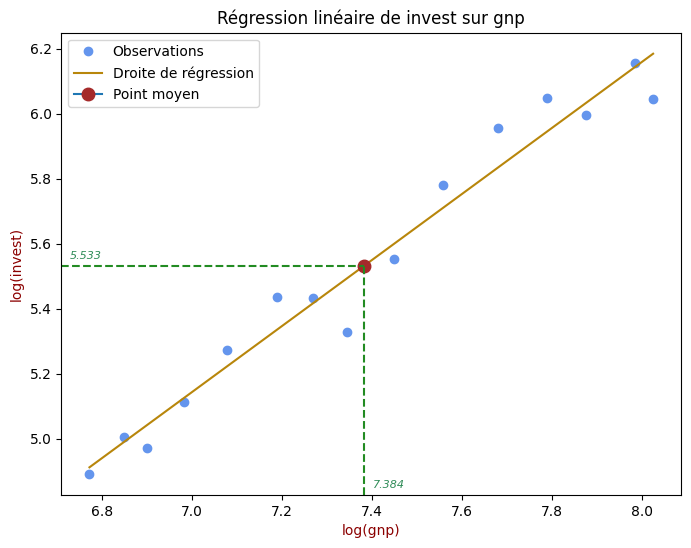

In [8]:
fig = plt.figure(figsize=(8,6))

plt.plot(X, Y, 'o', label="Observations", color="cornflowerblue")
plt.plot(X, Y_pred, label="Droite de régression", color="darkgoldenrod")

plt.plot(X_bar, Y_bar, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (X_bar-x_min)/(x_max-x_min)
ymax = (Y_bar-y_min)/(y_max-y_min)

plt.axhline(y=Y_bar, xmin=0, xmax=xmax, linestyle='--', color='forestgreen')
plt.axvline(x=X_bar, ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(x_min+0.02, Y_bar+0.02, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(X_bar+0.02, y_min+0.02, str(round(X_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Régression linéaire de invest sur gnp")
plt.xlabel("log(gnp)", color='darkred')
plt.ylabel("log(invest)", color='darkred')

plt.legend(loc='upper left')

plt.show()

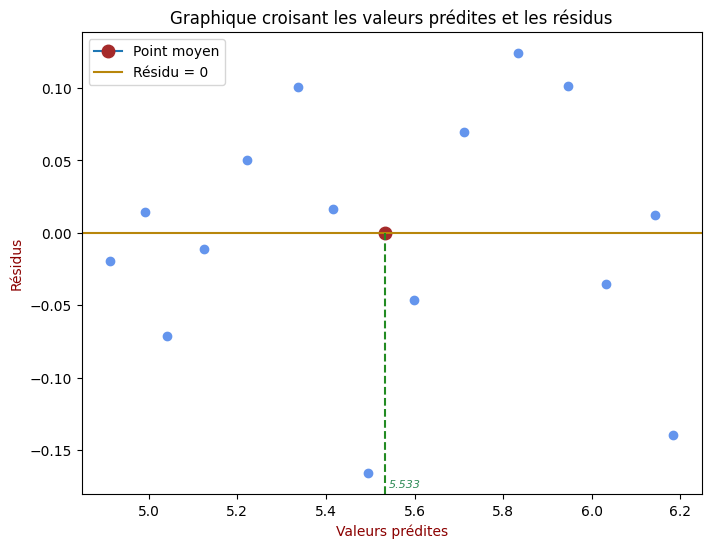

In [9]:
fig = plt.figure(figsize=(8,6))

plt.plot(Y_pred, Y-Y_pred, 'o', color="cornflowerblue")
plt.plot(Y_bar, 0, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.axhline(y=0, xmin=0, xmax=1, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
y_min, y_max = axes.get_ylim()

ymax = -y_min / (y_max-y_min)

plt.axvline(x=Y_bar, ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(Y_bar+0.01, y_min+0.005, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs prédites et les résidus")
plt.xlabel("Valeurs prédites", color='darkred')
plt.ylabel("Résidus", color='darkred')

plt.legend(loc='upper left')

plt.show()

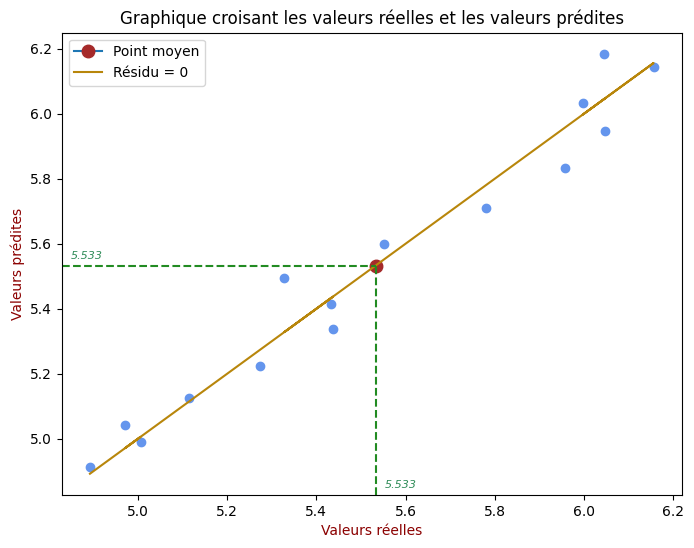

In [10]:
fig = plt.figure(figsize=(8,6))

plt.plot(Y, Y_pred, 'o', color="cornflowerblue")
plt.plot(Y_bar, Y_bar, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.plot(Y, Y, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (Y_bar-x_min)/(x_max-x_min)
ymax = (Y_bar-y_min)/(y_max-y_min)

plt.axhline(y=Y_bar, xmin=0, xmax=xmax, linestyle='--', color='forestgreen')
plt.axvline(x=Y_bar, ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(x_min+0.02, Y_bar+0.02, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(Y_bar+0.02, y_min+0.02, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs réelles et les valeurs prédites")
plt.xlabel("Valeurs réelles", color='darkred')
plt.ylabel("Valeurs prédites", color='darkred')

plt.legend(loc='upper left')

plt.show()

##### Distance de Cook :

Première méthode :

In [11]:
# Hat Matrix :
Z = np.concatenate((np.full((X.shape[0],1), 1), X.reshape(-1,1)), axis=1) 
G = np.dot(Z.T, Z)
H = Z @ np.linalg.inv(G) @ Z.T

In [12]:
def cook_distance(i):
    
    n = len(df)
    k = 2
    MSE = SSE / (n-k)
    
    hii = H[i][i]
    ei = (Y - Y_pred)[i]
    di = (hii / (1-hii)**2) * ((ei**2)/(k*MSE))
    
    return di # Distance de cook pour l'observation i

Deuxième méthode :

In [13]:
model = sm.OLS(Y, sm.add_constant(X)).fit()
cooks = model.get_influence().cooks_distance
cooks

(array([0.00886935, 0.00380074, 0.07457967, 0.00141839, 0.0212119 ,
        0.06389704, 0.00149422, 0.13837466, 0.01113484, 0.02966771,
        0.12615396, 0.11812735, 0.01916923, 0.00324212, 0.49700427]),
 array([0.99117586, 0.99620758, 0.92852771, 0.99858277, 0.9790453 ,
        0.93839434, 0.99850706, 0.87203794, 0.98893634, 0.97083359,
        0.88254513, 0.88952578, 0.98104101, 0.99676394, 0.61945236]))

Graphique :

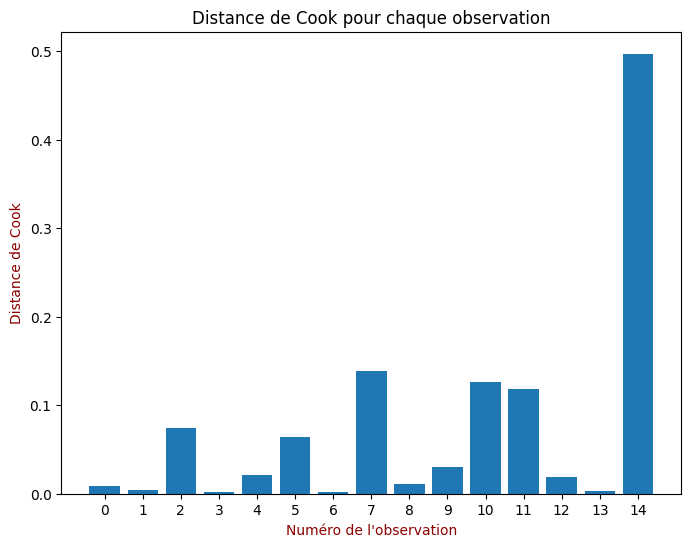

In [14]:
fig = plt.figure(figsize=(8,6))

plt.bar(list(range(len(df))) , list(cooks[0]))

plt.xticks(list(range(len(df))))

plt.title("Distance de Cook pour chaque observation")
plt.xlabel("Numéro de l'observation", color='darkred')
plt.ylabel("Distance de Cook", color='darkred')

plt.show()

On voit bien que l'observation 14 est la plus influente.

# Question 4 :

La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student (t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

H0 : pente = 0
<br>H1 : pente ≠ 0
<br>→ On veut savoir est-ce que la pente est nulle ou pas. Autrement dit, est-ce que X a-t-elle réellement une influence sur Y ?

In [15]:
t_score_1 = b1 / std_pente ### Statistique de test (t_score_1 suit une loi de Student à n-2 = 13 ddl)
p_value_1 = stat.t.sf(abs(t_score_1), df=13)*2
print("t_score = "+str(round(t_score_1,5)))
print("p_value = {:.5e}".format(p_value_1))

if p_value_1<0.05:
    print("\nRejet de H0 : La pente est significativement non nulle au risque 5%")
else:
    print("\nAcceptation de H0 : La pente est significativement nulle au risque 5%")

t_score = 18.33198
p_value = 1.13637e-10

Rejet de H0 : La pente est significativement non nulle au risque 5%


Faire le même test pour l'intercept.

In [16]:
t_score_0 = b0 / std_intercept ### Statistique de test (t_score_0 suit une loi de Student à n-2 = 13 ddl)
p_value_0 = stat.t.sf(abs(t_score_0), df=13)*2
print("t_score = "+str(round(t_score_0,5)))
print("p_value = {:.5e}".format(p_value_0))

if p_value_0<0.05:
    print("\nRejet de H0 : La droite de régression ne passe pas par l'origine au risque 5%")
else:
    print("\nAcceptation de H0 : La droite de régression passe par l'origine au risque 5%")

t_score = -4.79454
p_value = 3.50253e-04

Rejet de H0 : La droite de régression ne passe pas par l'origine au risque 5%


Coder manuellement l’expression des intervalles de confiance de la pente b1 et de l'intercept b0 et évaluez-la pour α = 0, 05

In [17]:
# Intervalle de confiance pour b1
def CI_b1(alpha):
    t = stat.t(df=len(Y)-2).ppf((alpha/2, 1 - alpha/2))
    b1_1 = b1 + t[0] * std_pente
    b1_2 = b1 + t[1] * std_pente
    return b1_1,b1_2

# Intervalle de confiance pour b0
def CI_b0(alpha):
    t = stat.t(df=len(Y)-2).ppf((alpha/2, 1 - alpha/2))
    b0_1 = b0 + t[0] * std_intercept
    b0_2 = b0 + t[1] * std_intercept
    return b0_1,b0_2

print("L'IC de b1 au niveau 0.95 est : [{} , {}]".format(round(CI_b1(0.05)[0],4) , round(CI_b1(0.05)[1],4)))
print("L'IC de b0 au niveau 0.95 est : [{} , {}]".format(round(CI_b0(0.05)[0],4) , round(CI_b0(0.05)[1],4)))

L'IC de b1 au niveau 0.95 est : [0.8956 , 1.1349]
L'IC de b0 au niveau 0.95 est : [-2.8484 , -1.0788]


Vérifier ces résultats à l'aide de statsmodels.

In [18]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

T_test = results.t_test(np.eye(len(results.params)))

print(T_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.9636      0.410     -4.795      0.000      -2.848      -1.079
c1             1.0153      0.055     18.332      0.000       0.896       1.135


In [19]:
print("pente :")      
print("t_score = "+str(round(T_test.tvalue[1],5)))
print("p_value = {:.5e}".format(T_test.pvalue[1]))

print("\nintercept :")      
print("t_score = "+str(round(T_test.tvalue[0],5)))
print("p_value = {:.5e}".format(T_test.pvalue[0]))

pente :
t_score = 18.33198
p_value = 1.13637e-10

intercept :
t_score = -4.79454
p_value = 3.50253e-04


In [20]:
IC_b1 = results.conf_int(alpha=0.05)[1]
IC_b0 = results.conf_int(alpha=0.05)[0]

print("L'IC de b1 au niveau 0.95 est : [{} , {}]".format(round(IC_b1[0],4) , round(IC_b1[1],4)))
print("L'IC de b0 au niveau 0.95 est : [{} , {}]".format(round(IC_b0[0],4) , round(IC_b0[1],4)))

L'IC de b1 au niveau 0.95 est : [0.8956 , 1.1349]
L'IC de b0 au niveau 0.95 est : [-2.8484 , -1.0788]


Réaliser un test de significativité globale.

In [21]:
### Table d'analyse de la variance (ANOVA) :
pd.DataFrame(data = {'Source de variation': ['Expliquée', 'Résiduelle', 'Totale'],
                      'Somme des carrés': [SSR, SSE, SST], 
                      'ddl': [1, len(Y)-2, len(Y)-1],
                      'Carré moyen': [SSR, SSE/(len(Y)-2), SST/(len(Y)-1)]}).set_index('Source de variation')

,Somme des carrés,ddl,Carré moyen
Source de variation,,,
Expliquée,2.579723,1,2.579723
Résiduelle,0.099792,13,0.007676
Totale,2.679515,14,0.191394


In [22]:
### Statistique de test :
f_score = SSR/(SSE/(len(Y)-2))
p_value_f = stat.f.sf(f_score, 1, len(Y)-2)
print("f_score = "+str(round(f_score,5)))
print("p_value = {:.5e}".format(p_value_f))

if p_value_f<0.05:
    print("\nRejet de H0 : La régression est globalement significative au risque 5%")
else:
    print("\nAcceptation de H0 : La régression n'est pas globalement significative au risque 5%")

f_score = 336.06165
p_value = 1.13637e-10

Rejet de H0 : La régression est globalement significative au risque 5%


In [23]:
### Deuxième méthode
print("f_score = "+str(round(sm.OLS(Y, sm.add_constant(X)).fit().fvalue,5)))
print("p_value = {:.5e}".format(sm.OLS(Y, sm.add_constant(X)).fit().f_pvalue))

f_score = 336.06165
p_value = 1.13637e-10


# Question 5 :

Pour GNP égal à 1000, estimer l’investissement prédit par le modèle.

In [24]:
gnp = 1000
invest_pred = math.exp(b0 + b1*math.log(gnp))
print("Pour GNP = 1000, le point de prédicition de log(invest) est : "+str(round(b0 + b1*math.log(gnp),4)))
print("Pour GNP = 1000, le point de prédicition de invest est : "+str(round(invest_pred,4)))

Pour GNP = 1000, le point de prédicition de log(invest) est : 5.0497
Pour GNP = 1000, le point de prédicition de invest est : 155.9794


Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%.

In [25]:
# Intervalle de confiance CI :
def CI(alpha, x):
    t = stat.t(df=13).ppf((alpha/2, 1 - alpha/2))
    y_hat = b0 + b1*x
    y1 = y_hat + t[0] * std_epsilon * np.sqrt(1/len(Y) + (x - X_bar)**2 / np.sum((X - X_bar)**2))
    y2 = y_hat + t[1] * std_epsilon * np.sqrt(1/len(Y) + (x - X_bar)**2 / np.sum((X - X_bar)**2))
    return y1,y2

# Intervalle de prédiction PI :
def PI(alpha, x):
    t = stat.t(df=13).ppf((alpha/2, 1 - alpha/2))
    y_hat = b0 + b1*x
    y1 = y_hat + t[0] * std_epsilon * np.sqrt(1 + 1/len(Y) + (x - X_bar)**2 / np.sum((X - X_bar)**2))
    y2 = y_hat + t[1] * std_epsilon * np.sqrt(1 + 1/len(Y) + (x - X_bar)**2 / np.sum((X - X_bar)**2))
    return y1,y2

In [26]:
x = math.log(1000)
alpha = 0.1

print("Quantiles = "+str(stat.t(df=13).ppf((alpha/2, 1 - alpha/2))))
print("\nL'intervalle de confiance au niveau 0.9 est : [{} , {}]".format(round(CI(alpha, x)[0],4) , round(CI(alpha, x)[1],4)))
print("L'intervalle de prédiction au niveau 0.9 est : [{} , {}]".format(round(PI(alpha, x)[0],4) , round(PI(alpha, x)[1],4)))

Quantiles = [-1.7709334  1.7709334]

L'intervalle de confiance au niveau 0.9 est : [4.9882 , 5.1112]
L'intervalle de prédiction au niveau 0.9 est : [4.8828 , 5.2166]


# Question 6 :

Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

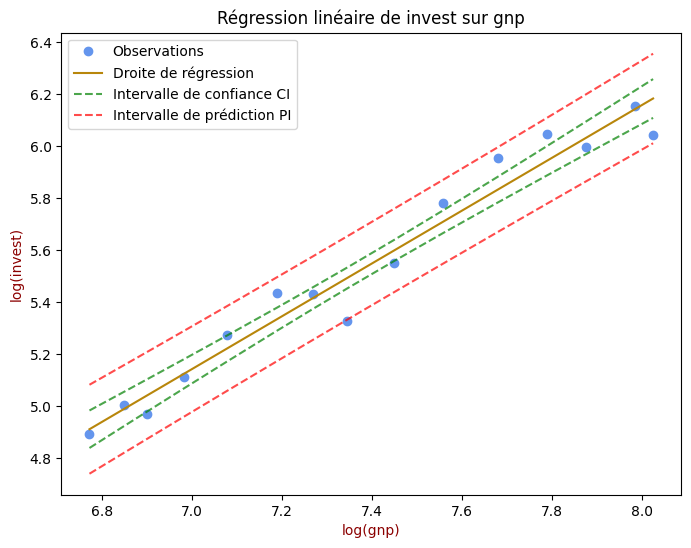

In [27]:
fig = plt.figure(figsize=(8,6))

plt.plot(X, Y, 'o', label="Observations", color="cornflowerblue")
plt.plot(X, Y_pred, label="Droite de régression", color="darkgoldenrod")

plt.plot(X, CI(0.1, X)[0], label="Intervalle de confiance CI", color="green", linestyle='--', alpha=0.7)
plt.plot(X, CI(0.1, X)[1], color="green", linestyle='--', alpha=0.7)

plt.plot(X, PI(0.1, X)[0], label="Intervalle de prédiction PI", color="red", linestyle='--', alpha=0.7)
plt.plot(X, PI(0.1, X)[1], color="red", linestyle='--', alpha=0.7)

plt.title("Régression linéaire de invest sur gnp")
plt.xlabel("log(gnp)", color='darkred')
plt.ylabel("log(invest)", color='darkred')

plt.legend(loc='upper left')

plt.show()

# Question 7 :

En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [28]:
X = X.reshape(-1,1)

reg = lm.LinearRegression(fit_intercept=True)
reg.fit(X,Y)

b0 = reg.intercept_
b1 = reg.coef_[0]
R2 = reg.score(X,Y)

gnp = 1000
log_gnp = math.log(gnp)
log_invest_pred = reg.predict(np.array(log_gnp).reshape(-1,1))[0]
invest_pred = math.exp(log_invest_pred)

print("intercept = " + str(round(b0,4)))
print("pente = " + str(round(b1,4)))
print("R2 = " + str(round(R2*100,2)) + "%")

print("\nPour GNP = 1000, le point de prédicition de log(invest) est : "+str(round(log_invest_pred,4)))
print("Pour GNP = 1000, le point de prédicition de invest est : "+str(round(invest_pred,4)))

intercept = -1.9636
pente = 1.0153
R2 = 96.28%

Pour GNP = 1000, le point de prédicition de log(invest) est : 5.0497
Pour GNP = 1000, le point de prédicition de invest est : 155.9794


In [29]:
### Deuxième méthode
results = sm.OLS(Y, sm.add_constant(X)).fit()

print("intercept = " + str(round(results.params[0],4)))
print("pente = " + str(round(results.params[1],4)))

intercept = -1.9636
pente = 1.0153


Les valeurs obtenues ici coïncident avec celles des questions précédentes.

# Question 8 :

Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, 
la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point 
une couleur différente).

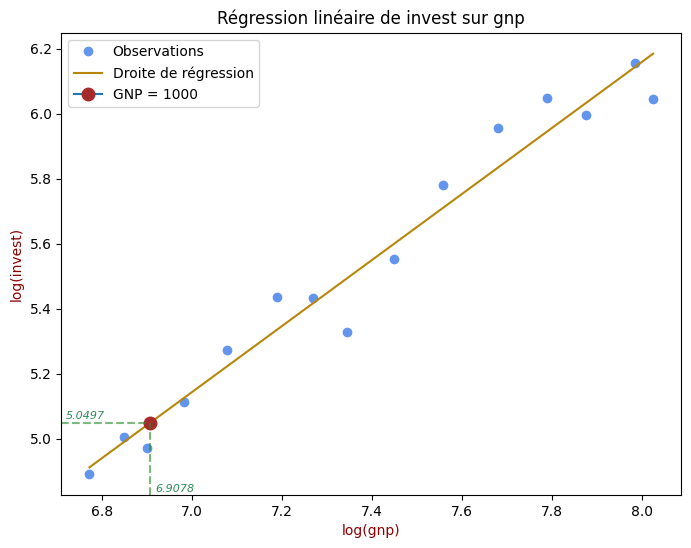

In [30]:
fig = plt.figure(figsize=(8,6))

plt.plot(X, Y, 'o', label="Observations", color="cornflowerblue")
plt.plot(X, reg.predict(X), label="Droite de régression", color="darkgoldenrod")

x = math.log(1000)
y = reg.predict(np.array(x).reshape(-1,1))[0]

plt.plot(x, y, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="GNP = 1000")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (x-x_min)/(x_max-x_min)
ymax = (y-y_min)/(y_max-y_min)

plt.axhline(y=y, xmin=0, xmax=xmax, linestyle='--', color='forestgreen', alpha=0.6)
plt.axvline(x=x, ymin=0, ymax=ymax, linestyle='--', color='forestgreen', alpha=0.6)

plt.text(x_min+0.01, y+0.01, str(round(y,4)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(x+0.01, y_min+0.01, str(round(x,4)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Régression linéaire de invest sur gnp")
plt.xlabel("log(gnp)", color='darkred')
plt.ylabel("log(invest)", color='darkred')

plt.legend(loc='upper left')

plt.show()

# Note :

On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). 
Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser 
de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

# Question 9 :

Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram non standardisée
$Z^{T}$Z. Est-elle de rang plein ?

In [31]:
X1 = np.asarray(np.log(df['gnp']))
X2 = np.asarray(df['interest'])
Y = np.asarray(np.log(df['invest']))

In [32]:
Z = np.concatenate((np.full((X1.shape[0],1), 1), X1.reshape(-1,1), X2.reshape(-1,1)), axis=1)
Z

array([[ 1.        ,  6.77239364,  5.16      ],
       [ 1.        ,  6.85012617,  5.87      ],
       [ 1.        ,  6.9004285 ,  5.95      ],
       [ 1.        ,  6.98249163,  4.88      ],
       [ 1.        ,  7.07825726,  4.5       ],
       [ 1.        ,  7.19022378,  6.44      ],
       [ 1.        ,  7.26836248,  7.83      ],
       [ 1.        ,  7.34549395,  6.25      ],
       [ 1.        ,  7.4489161 ,  5.5       ],
       [ 1.        ,  7.55919466,  5.46      ],
       [ 1.        ,  7.67966743,  7.46      ],
       [ 1.        ,  7.79061331, 10.28      ],
       [ 1.        ,  7.87591714, 11.77      ],
       [ 1.        ,  7.98538224, 13.42      ],
       [ 1.        ,  8.02535287, 11.02      ]])

In [33]:
Gram = np.dot(np.transpose(Z) , Z)
Gram

array([[ 15.        , 110.75282116, 111.79      ],
       [110.75282116, 820.24847688, 839.18854302],
       [111.79      , 839.18854302, 943.8557    ]])

In [34]:
# Valeurs propres
val_prop = np.linalg.eig(Gram)[0]
print("Les valeurs propres de la matrice de Gram sont : {}".format(val_prop))

Les valeurs propres de la matrice de Gram sont : [1.73787190e+03 1.82369697e-02 4.12140362e+01]


In [35]:
# Vecteurs propres
vec_prop = np.linalg.eig(Gram)[1]
print("Les vecteurs propres de la matrice de Gram sont : \n\n{}".format(vec_prop))

Les vecteurs propres de la matrice de Gram sont : 

[[ 0.09091344  0.98829863 -0.12247679]
 [ 0.67802329 -0.15150652 -0.71925669]
 [ 0.72939644  0.01765201  0.68386347]]


In [36]:
# Rang de la matrice Gram
print("rang(Gram) = "+str(len(np.linalg.eig(Gram)[0])))

rang(Gram) = 3


Si le rang d'une matrice est égal au nombre de colonnes, la matrice est dite de rang plein :

In [37]:
# Est-elle de rang plein ?
rang_Gram = len(np.linalg.eig(Gram)[0])
nb_colonnes_Gram = Gram.shape[1]

if rang_Gram==nb_colonnes_Gram:
    print("La matrice de Gram est de rang plein")
else:
    print("La matrice de Gram est de rang incomplet")

La matrice de Gram est de rang plein


Une autre façon de faire est de montrer qu'elle est inversible, en vérifiant qu'elle n'admet pas 0 comme valeur propre :

In [38]:
# Est-elle inversible ?
if (val_prop==0).any():
    print("La matrice de Gram n'est pas inversible")
else:
    print("La matrice de Gram est inversible")

La matrice de Gram est inversible


# Question 10 :

Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-types ainsi que 
le coefficient de détermination.

In [39]:
ZT = np.transpose(Z)
Gram = np.dot(ZT , Z)

# Puisque la matrice de Gram est inversible, alors l'estimation des paramètres du modèle est donnée par :
b = np.dot(np.linalg.inv(Gram), (np.dot(ZT, Y)))

b0 = b[0]
b1 = b[1]
b2 = b[2]

print("b0 = " + str(round(b0,4)))
print("b1 = " + str(round(b1,4)))
print("b2 = " + str(round(b2,4)))

b0 = -2.1805
b1 = 1.0512
b2 = -0.0065


In [40]:
n = X1.shape[0] ### Nombre d'observations
p = len(b) ### Nombre de paramètres

Y_pred = np.dot(Z,b) ### Valeurs prédites par le modèle

std_epsilon = np.sqrt(np.dot((Y - Y_pred).T , (Y - Y_pred)) / (n-p)) ### Estimation de l'écart-type de l'erreur
Cov_mat = (std_epsilon**2) * np.linalg.inv(Gram) ### Matrice de covariance des paramètres du modèle

print("Ecart-type (erreur) = "+str(round(std_epsilon,4)))
print("\nMatrice de covariance : \n{}".format(Cov_mat))

Ecart-type (erreur) = 0.0905

Matrice de covariance : 
[[ 4.38772697e-01 -6.72457405e-02  7.82053357e-03]
 [-6.72457405e-02  1.04165249e-02 -1.29683702e-03]
 [ 7.82053357e-03 -1.29683702e-03  2.35444629e-04]]


In [41]:
std_b0 = np.sqrt(Cov_mat[0][0])
std_b1 = np.sqrt(Cov_mat[1][1])
std_b2 = np.sqrt(Cov_mat[2][2])

print("Ecart-type (b0) = "+str(round(std_b0,4)))
print("Ecart-type (b1) = "+str(round(std_b1,4)))
print("Ecart-type (b2) = "+str(round(std_b2,4)))

Ecart-type (b0) = 0.6624
Ecart-type (b1) = 0.1021
Ecart-type (b2) = 0.0153


In [42]:
# Coefficient de détermination :
Y_bar = Y.mean()

SSE = np.dot((Y - Y_pred).T , (Y - Y_pred)) ### Error sum of squares
SSR = np.dot((Y_pred - Y_bar).T , (Y_pred - Y_bar)) ### Regression sum of squares
SST = np.dot((Y - Y_bar).T , (Y - Y_bar)) ### Total sum of squares

R2 = SSR/SST

R2_ajusté = 1 - (SSE/(n-p))/(SST/(n-1))

print("SSE = " + str(round(SSE,4)))
print("SSR = " + str(round(SSR,4)))
print("SST = " + str(round(SST,4)))
print("\nR2 = " + str(round(R2*100,2)) + "%")
print("\nR2 ajusté = " + str(round(R2_ajusté*100,2)) + "%")

SSE = 0.0983
SSR = 2.5812
SST = 2.6795

R2 = 96.33%

R2 ajusté = 95.72%


En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur) :

H0 : bj = 0
<br>H1 : bj ≠ 0
<br>→ On veut savoir est-ce que le coefficient bj est significatif dans la régression ou pas.

In [43]:
n = X1.shape[0] ### Nombre d'observations
p = len(b) ### Nombre de paramètres

# Les t_score suivent une loi de Student à n-p = 12 ddl
t_score_b0 = b0 / std_b0
p_value_b0 = stat.t.sf(abs(t_score_b0), df=n-p)*2

t_score_b1 = b1 / std_b1
p_value_b1 = stat.t.sf(abs(t_score_b1), df=n-p)*2

t_score_b2 = b2 / std_b2
p_value_b2 = stat.t.sf(abs(t_score_b2), df=n-p)*2

print("t_score_b0 = "+str(round(t_score_b0,5)))
print("p_value_b0 = {:.5e}".format(p_value_b0))
print("\nt_score_b1 = "+str(round(t_score_b1,5)))
print("p_value_b1 = {:.5e}".format(p_value_b1))
print("\nt_score_b2 = "+str(round(t_score_b2,5)))
print("p_value_b2 = {:.5e}\n".format(p_value_b2))

for i,p in enumerate([p_value_b0 , p_value_b1 , p_value_b2]):
    if p<0.05:
        print("Rejet de H0 : Le coefficient b"+str(i)+" est significativement non nul au risque 5%")
    else:
        print("Acceptation de H0 : Le coefficient b"+str(i)+" est significativement nul au risque 5%")

t_score_b0 = -3.29175
p_value_b0 = 6.43837e-03

t_score_b1 = 10.3001
p_value_b1 = 2.59952e-07

t_score_b2 = -0.42549
p_value_b2 = 6.78007e-01

Rejet de H0 : Le coefficient b0 est significativement non nul au risque 5%
Rejet de H0 : Le coefficient b1 est significativement non nul au risque 5%
Acceptation de H0 : Le coefficient b2 est significativement nul au risque 5%


Au niveau de signification 5%, on remarque que la variable 'interest' ne contribue pas de manière significative dans la régression, et donc peut être supprimée du modèle sans en détériorer le pouvoir explicatif, tandis que la varible 'gnp' 
semble être significative pour expliquer 'invest' puisque $\textit{p_value_b1}$ est largement inférieure à 0.05.

Coder manuellement l’expression des intervalles de confiance des coefficients b0, b1 et b2 et évaluez-la pour α = 0, 05

In [44]:
n = X1.shape[0] ### Nombre d'observations
p = len(b) ### Nombre de paramètres

# Intervalle de confiance pour b0
def CI_b0(alpha):
    t = stat.t(df=n-p).ppf((alpha/2, 1 - alpha/2))
    b0_1 = b0 + t[0] * std_b0
    b0_2 = b0 + t[1] * std_b0
    return b0_1,b0_2

# Intervalle de confiance pour b1
def CI_b1(alpha):
    t = stat.t(df=n-p).ppf((alpha/2, 1 - alpha/2))
    b1_1 = b1 + t[0] * std_b1
    b1_2 = b1 + t[1] * std_b1
    return b1_1,b1_2

# Intervalle de confiance pour b2
def CI_b2(alpha):
    t = stat.t(df=n-p).ppf((alpha/2, 1 - alpha/2))
    b2_1 = b2 + t[0] * std_b2
    b2_2 = b2 + t[1] * std_b2
    return b2_1,b2_2

print("L'IC de b0 au niveau 0.95 est : [{} , {}]".format(round(CI_b0(0.05)[0],4) , round(CI_b0(0.05)[1],4)))
print("L'IC de b1 au niveau 0.95 est : [{} , {}]".format(round(CI_b1(0.05)[0],4) , round(CI_b1(0.05)[1],4)))
print("L'IC de b2 au niveau 0.95 est : [{} , {}]".format(round(CI_b2(0.05)[0],4) , round(CI_b2(0.05)[1],4)))

L'IC de b0 au niveau 0.95 est : [-3.6237 , -0.7372]
L'IC de b1 au niveau 0.95 est : [0.8289 , 1.2736]
L'IC de b2 au niveau 0.95 est : [-0.04 , 0.0269]


Vérifier ces résultats à l'aide de statsmodels.

In [45]:
results = sm.OLS(Y, sm.add_constant(Z[:,1:])).fit()

T_test = results.t_test(np.eye(len(results.params)))

print(T_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.1805      0.662     -3.292      0.006      -3.624      -0.737
c1             1.0512      0.102     10.300      0.000       0.829       1.274
c2            -0.0065      0.015     -0.425      0.678      -0.040       0.027


In [46]:
print("b0 :")      
print("t_score = "+str(round(T_test.tvalue[0],5)))
print("p_value = {:.5e}".format(T_test.pvalue[0]))

print("\nb1 :")      
print("t_score = "+str(round(T_test.tvalue[1],5)))
print("p_value = {:.5e}".format(T_test.pvalue[1]))

print("\nb2 :")      
print("t_score = "+str(round(T_test.tvalue[2],5)))
print("p_value = {:.5e}".format(T_test.pvalue[2]))

b0 :
t_score = -3.29175
p_value = 6.43837e-03

b1 :
t_score = 10.3001
p_value = 2.59952e-07

b2 :
t_score = -0.42549
p_value = 6.78007e-01


In [47]:
IC_b0 = results.conf_int(alpha=0.05)[0]
IC_b1 = results.conf_int(alpha=0.05)[1]
IC_b2 = results.conf_int(alpha=0.05)[2]

print("L'IC de b0 au niveau 0.95 est : [{} , {}]".format(round(IC_b0[0],4) , round(IC_b0[1],4)))
print("L'IC de b1 au niveau 0.95 est : [{} , {}]".format(round(IC_b1[0],4) , round(IC_b1[1],4)))
print("L'IC de b2 au niveau 0.95 est : [{} , {}]".format(round(IC_b2[0],4) , round(IC_b2[1],4)))

L'IC de b0 au niveau 0.95 est : [-3.6237 , -0.7372]
L'IC de b1 au niveau 0.95 est : [0.8289 , 1.2736]
L'IC de b2 au niveau 0.95 est : [-0.04 , 0.0269]


Réaliser un test de significativité globale.

In [48]:
n = X1.shape[0] ### Nombre d'observations
p = len(b) ### Nombre de paramètres

### Table d'analyse de la variance (ANOVA) :
pd.DataFrame(data = {'Source de variation': ['Expliquée', 'Résiduelle', 'Totale'],
                      'Somme des carrés': [SSR, SSE, SST], 
                      'ddl': [p-1, n-p, n-1],
                      'Carré moyen': [SSR/(p-1), SSE/(n-p), SST/(n-1)]}).set_index('Source de variation')

,Somme des carrés,ddl,Carré moyen
Source de variation,,,
Expliquée,2.581206,2,1.290603
Résiduelle,0.098309,12,0.008192
Totale,2.679515,14,0.191394


In [49]:
### Statistique de test :
f_score = (SSR/(p-1)) / (SSE/(n-p))
p_value_f = stat.f.sf(f_score, p-1, n-p)
print("f_score = "+str(round(f_score,5)))
print("p_value = {:.5e}".format(p_value_f))

if p_value_f<0.05:
    print("\nRejet de H0 : La régression est globalement significative au risque 5%")
else:
    print("\nAcceptation de H0 : La régression n'est pas globalement significative au risque 5%")

f_score = 157.536
p_value = 2.43909e-09

Rejet de H0 : La régression est globalement significative au risque 5%


In [50]:
### Deuxième méthode
print("f_score = "+str(round(sm.OLS(Y, sm.add_constant(Z[:,1:])).fit().fvalue,5)))
print("p_value = {:.5e}".format(sm.OLS(Y, sm.add_constant(Z[:,1:])).fit().f_pvalue))

f_score = 157.536
p_value = 2.43909e-09


Graphiques :

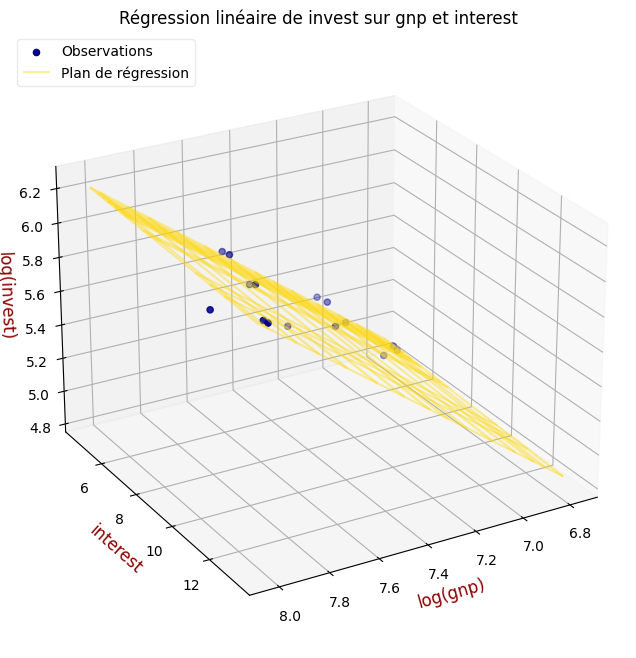

In [51]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection ="3d")
ax.view_init(25, 60)

observations = ax.scatter3D(X1, X2, Y, 'o', label="Observations", color="darkblue")

# Plan de régression
X1_3d, X2_3d = np.meshgrid(X1, X2)
Y_pred_3d = b0 + b1*X1_3d + b2*X2_3d
plan_regression = ax.plot_wireframe(X1_3d, X2_3d, Y_pred_3d, label="Plan de régression", color="gold", alpha=0.4)

plt.title("Régression linéaire de invest sur gnp et interest")

ax.set_xlabel("log(gnp)", color='darkred', fontsize=12)
ax.set_ylabel("interest", color='darkred', fontsize=12)
ax.set_zlabel("log(invest)", color='darkred', fontsize=12)

plt.legend(loc='upper left', fontsize=10, framealpha=0.4)

plt.show()

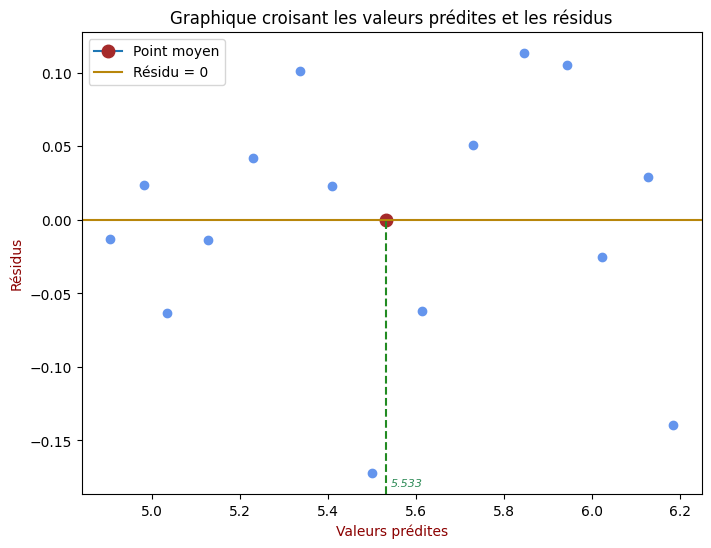

In [52]:
fig = plt.figure(figsize=(8,6))

plt.plot(Y_pred, Y-Y_pred, 'o', color="cornflowerblue")
plt.plot(Y_bar, 0, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.axhline(y=0, xmin=0, xmax=1, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
y_min, y_max = axes.get_ylim()

ymax = -y_min / (y_max-y_min)

plt.axvline(x=Y_bar, ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(Y_bar+0.01, y_min+0.005, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs prédites et les résidus")
plt.xlabel("Valeurs prédites", color='darkred')
plt.ylabel("Résidus", color='darkred')

plt.legend(loc='upper left')

plt.show()

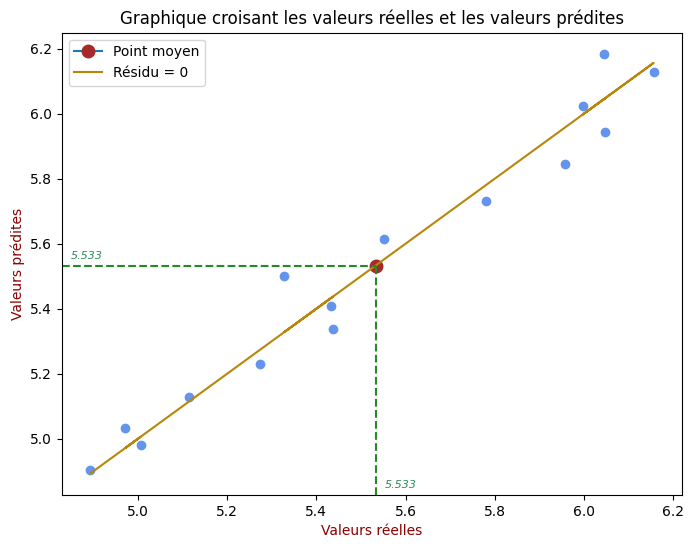

In [53]:
fig = plt.figure(figsize=(8,6))

plt.plot(Y, Y_pred, 'o', color="cornflowerblue")
plt.plot(Y_bar, Y_bar, marker='o', markersize=9, markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.plot(Y, Y, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (Y_bar-x_min)/(x_max-x_min)
ymax = (Y_bar-y_min)/(y_max-y_min)

plt.axhline(y=Y_bar, xmin=0, xmax=xmax, linestyle='--', color='forestgreen')
plt.axvline(x=Y_bar, ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(x_min+0.02, Y_bar+0.02, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(Y_bar+0.02, y_min+0.02, str(round(Y_bar,3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs réelles et les valeurs prédites")
plt.xlabel("Valeurs réelles", color='darkred')
plt.ylabel("Valeurs prédites", color='darkred')

plt.legend(loc='upper left')

plt.show()

##### Distance de Cook : 

Première méthode :

In [54]:
H = Z @ np.linalg.inv(Gram) @ Z.T

def cook_distance(i):
    
    n = len(df)
    k = len(b)
    MSE = SSE / (n-k)
    
    hii = H[i][i]
    ei = (Y - Y_pred)[i]
    di = (hii / (1-hii)**2) * ((ei**2)/(k*MSE))
    
    return di # Distance de cook pour l'observation i

In [55]:
model = sm.OLS(Y, sm.add_constant(Z[:,1:])).fit()
cooks = model.get_influence().cooks_distance
cooks

(array([0.00289   , 0.00897787, 0.05072027, 0.00135093, 0.01485402,
        0.04022933, 0.00274319, 0.14112997, 0.05682442, 0.07699369,
        0.13717011, 0.08731251, 0.01039701, 0.04234288, 0.3095953 ]),
 array([0.99977293, 0.99876517, 0.98417071, 0.9999273 , 0.99738931,
        0.98868802, 0.99978998, 0.93338611, 0.98135462, 0.97123585,
        0.93590001, 0.96565203, 0.99846355, 0.9878135 , 0.81808655]))

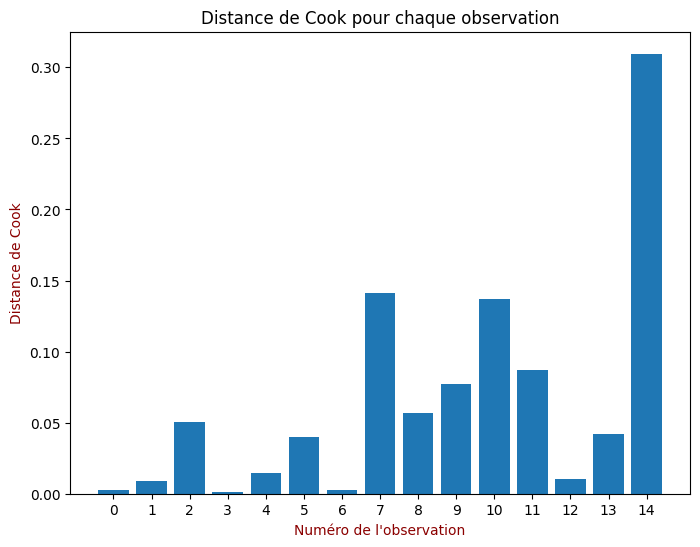

In [56]:
fig = plt.figure(figsize=(8,6))

plt.bar(list(range(len(df))) , list(cooks[0]))

plt.xticks(list(range(len(df))))

plt.title("Distance de Cook pour chaque observation")
plt.xlabel("Numéro de l'observation", color='darkred')
plt.ylabel("Distance de Cook", color='darkred')

plt.show()

L'observation 14 est à nouveau la plus influente.

# Question 11 :

Pour les valeurs de GNP 1000 et interest 10, prédire log(investment).

In [57]:
gnp = 1000
interest = 10

x = np.array((1, math.log(gnp), interest))
log_invest_pred = np.dot(x.T , b)
invest_pred = math.exp(log_invest_pred)

print("Pour GNP = 1000 et interest = 10, le point de prédicition de log(invest) est : "+str(round(log_invest_pred,4)))
print("Pour GNP = 1000 et interest = 10, le point de prédicition de invest est : "+str(round(invest_pred,4)))

Pour GNP = 1000 et interest = 10, le point de prédicition de log(invest) est : 5.016
Pour GNP = 1000 et interest = 10, le point de prédicition de invest est : 150.8044


In [58]:
# Intervalle de confiance CI :
def CI(alpha, x):
    t = stat.t(df=12).ppf((alpha/2, 1 - alpha/2))
    y_hat = np.dot(x , b)
    
    if (len(x.shape)==1):
        y1 = y_hat + t[0] * std_epsilon * np.sqrt(x @ np.linalg.inv(Gram) @ x.T)
        y2 = y_hat + t[1] * std_epsilon * np.sqrt(x @ np.linalg.inv(Gram) @ x.T)
    else:
        y1 = y_hat + t[0] * std_epsilon * np.sqrt((x @ np.linalg.inv(Gram) @ x.T).diagonal())
        y2 = y_hat + t[1] * std_epsilon * np.sqrt((x @ np.linalg.inv(Gram) @ x.T).diagonal())
        
    return y1,y2

# Intervalle de prédiction PI :
def PI(alpha, x):
    t = stat.t(df=12).ppf((alpha/2, 1 - alpha/2))
    y_hat = np.dot(x , b)
    
    if (len(x.shape)==1):
        y1 = y_hat + t[0] * std_epsilon * np.sqrt(1 + (x @ np.linalg.inv(Gram) @ x.T))
        y2 = y_hat + t[1] * std_epsilon * np.sqrt(1 + (x @ np.linalg.inv(Gram) @ x.T))
    else :
        y1 = y_hat + t[0] * std_epsilon * np.sqrt(1 + (x @ np.linalg.inv(Gram) @ x.T).diagonal())
        y2 = y_hat + t[1] * std_epsilon * np.sqrt(1 + (x @ np.linalg.inv(Gram) @ x.T).diagonal())
        
    return y1,y2

In [59]:
x = np.array((1, math.log(1000), 10)).T
alpha = 0.001

print("Quantiles = "+str(stat.t(df=12).ppf((alpha/2, 1 - alpha/2))))
print("\nL'intervalle de confiance au niveau 0.999 est : [{} , {}]".format(round(CI(alpha, x)[0],4) , round(CI(alpha, x)[1],4)))
print("L'intervalle de prédiction au niveau 0.999 est : [{} , {}]".format(round(PI(alpha, x)[0],4) , round(PI(alpha, x)[1],4)))

Quantiles = [-4.31779128  4.31779128]

L'intervalle de confiance au niveau 0.999 est : [4.6402 , 5.3918]
L'intervalle de prédiction au niveau 0.999 est : [4.4738 , 5.5582]


# Question 12 :

Sur un même graphe à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99.9% (ces surfaces seront tracées sur le domaine de définition des données). On pourra par exemple
utiliser la librairie mplot3D

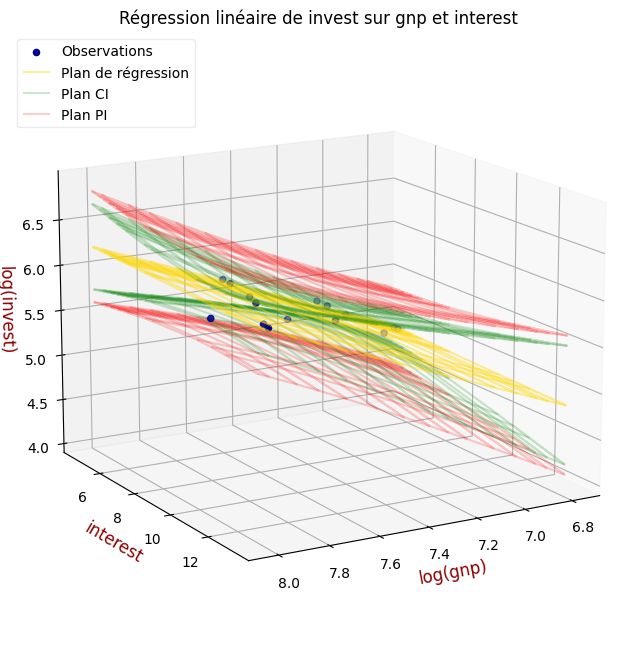

In [60]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection ="3d")
ax.view_init(15, 60)

observations = ax.scatter3D(X1, X2, Y, 'o', label="Observations", color="darkblue")

# Plan de régression
X1_3d, X2_3d = np.meshgrid(X1, X2)
Y_pred_3d = b0 + b1*X1_3d + b2*X2_3d
plan_regression = ax.plot_wireframe(X1_3d, X2_3d, Y_pred_3d, label="Plan de régression", color="gold", alpha=0.4)

# Plan correspondant à CI
X1_3d_CI_PI = X1_3d.reshape((X1_3d.size,))
X2_3d_CI_PI = X2_3d.reshape((X2_3d.size,))
M = np.concatenate((np.full((X1_3d.size,1), 1), X1_3d_CI_PI.reshape(-1,1), X2_3d_CI_PI.reshape(-1,1)), axis=1)
CI_3d_1 = CI(alpha, M)[0].reshape(X1_3d.shape)
CI_3d_2 = CI(alpha, M)[1].reshape(X1_3d.shape)
plan_CI_1 = ax.plot_wireframe(X1_3d, X2_3d, CI_3d_1, label="Plan CI", color="green", alpha=0.2)
plan_CI_2 = ax.plot_wireframe(X1_3d, X2_3d, CI_3d_2, color="green", alpha=0.2)

# Plan correspondant à PI
PI_3d_1 = PI(alpha, M)[0].reshape(X1_3d.shape)
PI_3d_2 = PI(alpha, M)[1].reshape(X1_3d.shape)
plan_PI_1 = ax.plot_wireframe(X1_3d, X2_3d, PI_3d_1, label="Plan PI", color="red", alpha=0.2)
plan_PI_2 = ax.plot_wireframe(X1_3d, X2_3d, PI_3d_2, color="red", alpha=0.2)

plt.title("Régression linéaire de invest sur gnp et interest")

ax.set_xlabel("log(gnp)", color='darkred', fontsize=12)
ax.set_ylabel("interest", color='darkred', fontsize=12)
ax.set_zlabel("log(invest)", color='darkred', fontsize=12)

plt.legend(loc='upper left', fontsize=10, framealpha=0.4)

plt.show()

# Question 13 :

En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest
10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire.
Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [61]:
reg = lm.LinearRegression(fit_intercept=True)
reg.fit(Z[:,1:],Y)

b0 = reg.intercept_
b1 = reg.coef_[0]
b2 = reg.coef_[1]

R2 = reg.score(Z[:,1:],Y)

gnp = 1000
interest = 10
log_gnp = math.log(gnp)

log_invest_pred = reg.predict(np.array((math.log(1000), 10)).reshape(1,-1))[0]
invest_pred = math.exp(log_invest_pred)

print("b0 = " + str(round(b0,4)))
print("b1 = " + str(round(b1,4)))
print("b2 = " + str(round(b2,4)))

print("\nR2 = " + str(round(R2*100,2)) + "%")

print("\nPour GNP = 1000, le point de prédicition de log(invest) est : "+str(round(log_invest_pred,4)))
print("Pour GNP = 1000, le point de prédicition de invest est : "+str(round(invest_pred,4)))

b0 = -2.1805
b1 = 1.0512
b2 = -0.0065

R2 = 96.33%

Pour GNP = 1000, le point de prédicition de log(invest) est : 5.016
Pour GNP = 1000, le point de prédicition de invest est : 150.8044


Les valeurs obtenues ici coïncident avec celles des questions précédentes.

# Question 14 :

Charger le dataset sur le diabète à partir de sklearn (load_diabetes(return_X_y=True)) et soit X
la troisième colonne des données chargées (la matrice des covariables est constituée uniquement de la
variable 3 du dataset original).

In [62]:
diabetes = datasets.load_diabetes(return_X_y=True)

diabetes

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [63]:
X = diabetes[0][:,2]
Y = diabetes[1]

print("Dimension de X = "+str(X.shape))
print("Dimension de Y = "+str(Y.shape))

Dimension de X = (442,)
Dimension de Y = (442,)


Donner le coefficient OLS pour la pente $θ_{1}$ :

In [64]:
X_bar = X.mean()
Y_bar = Y.mean()

θ1 = np.sum((X - X_bar)*(Y - Y_bar)) / np.sum((X - X_bar)**2)
θ0 = Y_bar - b1*X_bar

print("θ1 = "+str(round(θ1,4)))
print("θ0 = "+str(round(θ0,4)))

θ1 = 949.4353
θ0 = 152.1335


In [65]:
n = len(X)

Y_pred = θ0 + θ1*X
std_epsilon = np.sqrt(np.sum((Y - Y_pred)**2) / (n-2))
std_θ1 = std_epsilon * np.sqrt(1 / np.sum((X - X_bar)**2))
std_θ0 = std_epsilon * np.sqrt(1/n + X_bar**2 / np.sum((X - X_bar)**2))

print("Ecart-type (erreur) = "+str(round(std_epsilon,4)))
print("Ecart-type (θ1) = "+str(round(std_θ1,4)))
print("Ecart-type (θ0) = "+str(round(std_θ0,4)))

Ecart-type (erreur) = 62.5151
Ecart-type (θ1) = 62.5151
Ecart-type (θ0) = 2.9735


Coder manuellement l’expression des intervalles de confiance et évaluez-la pour α = 0, 05

In [66]:
# Intervalle de confiance pour theta_1
def CI_θ1(alpha):
    t = stat.t(df=n-2).ppf((alpha/2, 1 - alpha/2))
    θ1_1 = θ1 + t[0] * std_θ1
    θ1_2 = θ1 + t[1] * std_θ1
    return θ1_1,θ1_2

# Intervalle de confiance pour theta_0
def CI_θ0(alpha):
    t = stat.t(df=n-2).ppf((alpha/2, 1 - alpha/2))
    θ0_1 = θ0 + t[0] * std_θ0
    θ0_2 = θ0 + t[1] * std_θ0
    return θ0_1,θ0_2

alpha = 0.05

print("L'IC de θ1 au niveau 0.95 est : [{} , {}]".format(round(CI_θ1(alpha)[0],4) , round(CI_θ1(alpha)[1],4)))
print("L'IC de θ0 au niveau 0.95 est : [{} , {}]".format(round(CI_θ0(alpha)[0],4) , round(CI_θ0(alpha)[1],4)))

L'IC de θ1 au niveau 0.95 est : [826.5699 , 1072.3006]
L'IC de θ0 au niveau 0.95 est : [146.2894 , 157.9776]


Vérifier ces résultats :

In [67]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

T_test = results.t_test(np.eye(len(results.params)))

print(T_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           152.1335      2.974     51.162      0.000     146.289     157.978
c1           949.4353     62.515     15.187      0.000     826.570    1072.301


Nous désignons la concaténation de X et y par Xy. Générer k échantillons bootstrap à partir
de Xy, pour k ∈ {100, 300, 600, 1000}. Un échantillon bootstrap a la même dimension que Xy
et est formé de points de données (lignes) tirés, avec remplacement, de Xy.

In [68]:
Xy = np.concatenate((X.reshape(-1,1) , Y.reshape(-1,1)), axis=1)

def bootstrap(data, k):
    samples = np.stack((data[np.random.randint(data.shape[0],size=data.shape[0])],
                       data[np.random.randint(data.shape[0],size=data.shape[0])]))
    
    for i in range(k-2):
        sample = data[np.random.randint(data.shape[0],size=data.shape[0])]
        samples = np.stack((*samples, sample))
    
    return samples

In [69]:
samples_100 = bootstrap(Xy, 100)
samples_300 = bootstrap(Xy, 300)
samples_600 = bootstrap(Xy, 600)
samples_1000 = bootstrap(Xy, 1000)

print(samples_100.shape)
print(samples_300.shape)
print(samples_600.shape)
print(samples_1000.shape)

(100, 442, 2)
(300, 442, 2)
(600, 442, 2)
(1000, 442, 2)


Pour chaque valeur de k :
<br>(i) Estimez le coefficient θ1 pour chaque échantillon bootstrap avec sklearn
<br>(ii) Obtenez une approximation de l’IC en obtenant les quantiles α/2 et 1 - α/2 des valeurs de l’étape (i).

In [70]:
# k = 100 :
θ1_100 = []
reg = lm.LinearRegression(fit_intercept=True)
for i in range(100):
    reg.fit(samples_100[i][:,0].reshape(-1,1) , samples_100[i][:,1])
    θ1_100.append(reg.coef_[0])
θ1_100.sort()

# k = 300 :
θ1_300 = []
reg = lm.LinearRegression(fit_intercept=True)
for i in range(300):
    reg.fit(samples_300[i][:,0].reshape(-1,1) , samples_300[i][:,1])
    θ1_300.append(reg.coef_[0])
θ1_300.sort()

# k = 600 :
θ1_600 = []
reg = lm.LinearRegression(fit_intercept=True)
for i in range(600):
    reg.fit(samples_600[i][:,0].reshape(-1,1) , samples_600[i][:,1])
    θ1_600.append(reg.coef_[0])
θ1_600.sort()

# k = 1000 :
θ1_1000 = []
reg = lm.LinearRegression(fit_intercept=True)
for i in range(1000):
    reg.fit(samples_1000[i][:,0].reshape(-1,1) , samples_1000[i][:,1])
    θ1_1000.append(reg.coef_[0])
θ1_1000.sort()

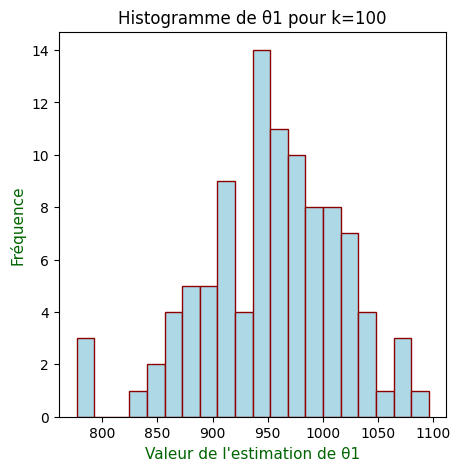

In [71]:
fig = plt.figure(figsize=(5,5))

plt.hist(θ1_100, bins = 20, color="lightblue", ec="darkred")

plt.title("Histogramme de θ1 pour k=100")
plt.xlabel("Valeur de l'estimation de θ1", color='darkgreen', fontsize=11)
plt.ylabel("Fréquence", color='darkgreen', fontsize=11)

plt.show()

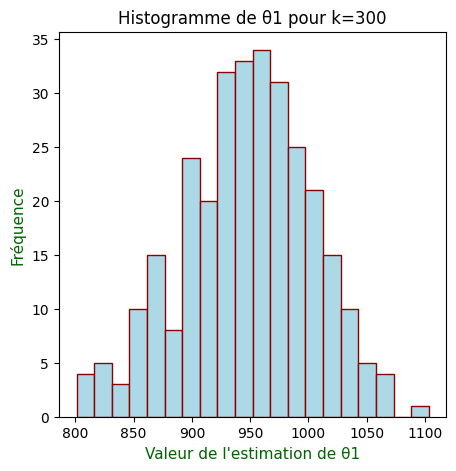

In [72]:
fig = plt.figure(figsize=(5,5))

plt.hist(θ1_300, bins = 20, color="lightblue", ec="darkred")

plt.title("Histogramme de θ1 pour k=300")
plt.xlabel("Valeur de l'estimation de θ1", color='darkgreen', fontsize=11)
plt.ylabel("Fréquence", color='darkgreen', fontsize=11)

plt.show()

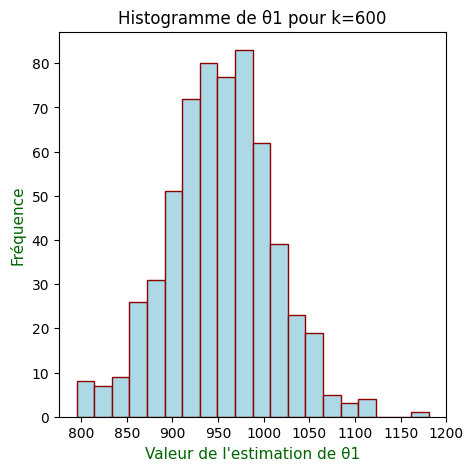

In [73]:
fig = plt.figure(figsize=(5,5))

plt.hist(θ1_600, bins = 20, color="lightblue", ec="darkred")

plt.title("Histogramme de θ1 pour k=600")
plt.xlabel("Valeur de l'estimation de θ1", color='darkgreen', fontsize=11)
plt.ylabel("Fréquence", color='darkgreen', fontsize=11)

plt.show()

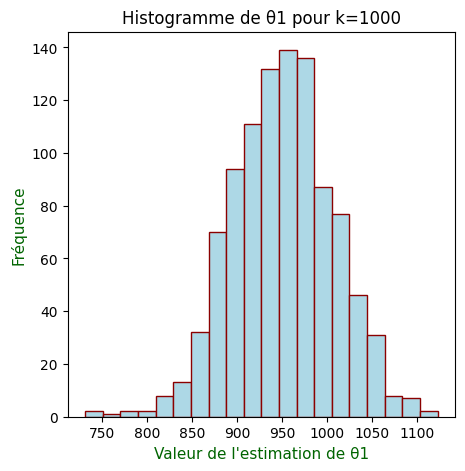

In [74]:
fig = plt.figure(figsize=(5,5))

plt.hist(θ1_1000, bins = 20, color="lightblue", ec="darkred")

plt.title("Histogramme de θ1 pour k=1000")
plt.xlabel("Valeur de l'estimation de θ1", color='darkgreen', fontsize=11)
plt.ylabel("Fréquence", color='darkgreen', fontsize=11)

plt.show()

L’approche “bootstrap percentile” consiste alors à ordonner les k estimations de θ1, de la plus petite à la plus grande, et à estimer leurs percentiles 2.5 et 97.5 (dans notre cas, nous avons α = 0.05). Le percentile 2.5 correspond au seuil en dessous duquel seules 2.5% des θ1 ordonnées sont présentes. De la même façon, le percentile 97.5 correspond au seuil au dessus duquel seules 2.5% des θ1 estimées ordonnées sont présentes.

In [75]:
print("Pour k = 100 : IC = [{} , {}]".format(round(np.quantile(θ1_100, 0.025),4) , round(np.quantile(θ1_100, 0.975),4)))
print("Pour k = 300 : IC = [{} , {}]".format(round(np.quantile(θ1_300, 0.025),4) , round(np.quantile(θ1_300, 0.975),4)))
print("Pour k = 600 : IC = [{} , {}]".format(round(np.quantile(θ1_600, 0.025),4) , round(np.quantile(θ1_600, 0.975),4)))
print("Pour k = 1000 : IC = [{} , {}]".format(round(np.quantile(θ1_1000, 0.025),4) , round(np.quantile(θ1_1000, 0.975),4)))

Pour k = 100 : IC = [810.3639 , 1067.2874]
Pour k = 300 : IC = [829.5925 , 1046.6435]
Pour k = 600 : IC = [835.7304 , 1057.6545]
Pour k = 1000 : IC = [847.595 , 1058.4502]


Tracer, pour chaque valeur de k, la différence entre l’IC approximé à l’étape précédente et l’IC réel.

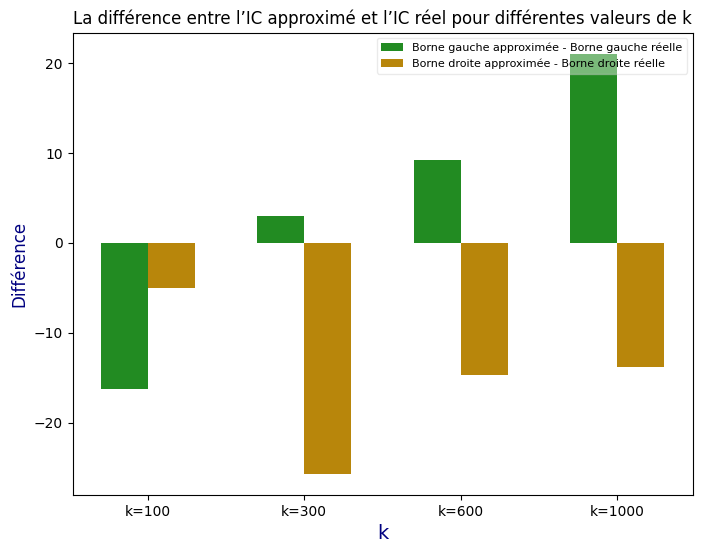

In [76]:
fig = plt.figure(figsize=(8,6))

θ1_k = [θ1_100 , θ1_300 , θ1_600 , θ1_1000]

y1 = [np.quantile(i, 0.025) - CI_θ1(0.05)[0] for i in θ1_k]
y2 = [np.quantile(i, 0.975) - CI_θ1(0.05)[1] for i in θ1_k]

bar_width = 0.3

x1 = range(len(y1))
x2 = [i + bar_width for i in x1]

plt.bar(x1, y1, width=bar_width, color='forestgreen', label='Borne gauche approximée - Borne gauche réelle')
plt.bar(x2, y2, width=bar_width, color='darkgoldenrod', label='Borne droite approximée - Borne droite réelle')

plt.xticks([i + bar_width/2 for i in range(len(y1))], ['k=100', 'k=300', 'k=600' , 'k=1000'])

plt.title("La différence entre l’IC approximé et l’IC réel pour différentes valeurs de k")
plt.xlabel("k", color='navy', fontsize=14)
plt.ylabel("Différence", color='navy', fontsize=12)

plt.legend(loc='upper right', fontsize=8, framealpha=0.4)

plt.show()

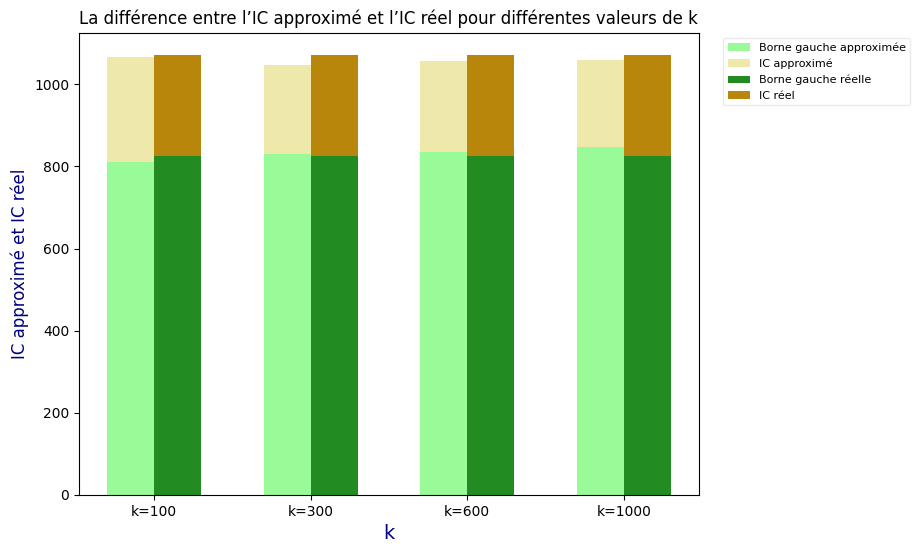

In [77]:
fig = plt.figure(figsize=(8,6))

θ1_k = [θ1_100 , θ1_300 , θ1_600 , θ1_1000]

y1 = [np.quantile(i, 0.025) for i in θ1_k]
y2 = [np.quantile(i, 0.975) for i in θ1_k]
y3 = [CI_θ1(0.05)[0] for i in θ1_k]
y4 = [CI_θ1(0.05)[1] for i in θ1_k]

y2_y1 = [y2_i - y1_i for y2_i, y1_i in zip(y2, y1)]
y4_y3 = [y4_i - y3_i for y4_i, y3_i in zip(y4, y3)]

bar_width = 0.3

x1 = range(len(y1))
x2 = [i + bar_width for i in x1]

plt.bar(x1, y1, width=bar_width, color='palegreen', label='Borne gauche approximée')
plt.bar(x1, y2_y1, width=bar_width, bottom=y1, color='palegoldenrod', label='IC approximé')
plt.bar(x2, y3, width=bar_width, color='forestgreen', label='Borne gauche réelle')
plt.bar(x2, y4_y3, width=bar_width, bottom=y3, color='darkgoldenrod', label='IC réel')

plt.xticks([i + bar_width/2 for i in range(len(y1))], ['k=100', 'k=300', 'k=600' , 'k=1000'])

plt.title("La différence entre l’IC approximé et l’IC réel pour différentes valeurs de k")
plt.xlabel("k", color='navy', fontsize=14)
plt.ylabel("IC approximé et IC réel", color='navy', fontsize=12)

plt.legend(loc='upper right', fontsize=8, framealpha=0.4, bbox_to_anchor=(1.35, 1))

plt.show()

L’IC augmente-t-il avec α ?

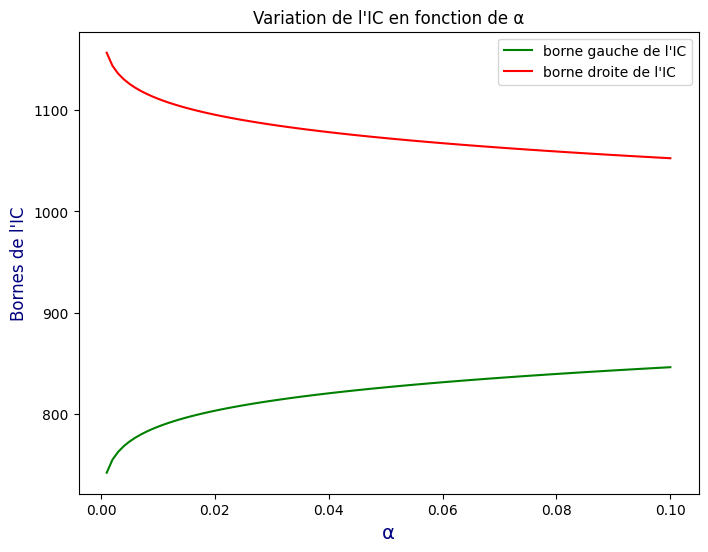

In [78]:
fig = plt.figure(figsize=(8,6))

alpha = list(np.linspace(0.001, 0.1, num=100))

y1 = [CI_θ1(i)[0] for i in alpha]
y2 = [CI_θ1(i)[1] for i in alpha]

plt.plot(alpha, y1, label="borne gauche de l'IC", color='green')
plt.plot(alpha, y2, label="borne droite de l'IC", color='red')

plt.title("Variation de l'IC en fonction de α")
plt.xlabel("α", color='navy', fontsize=14)
plt.ylabel("Bornes de l'IC", color='navy', fontsize=12)

plt.legend(loc='upper right')

plt.show()

Plus α augmente, plus les bornes de l'IC se rapprochent, et donc plus la largeur de l'IC diminue.